In [205]:
from projet_etu import *
from  mltools import *
import matplotlib.pyplot as plt
import numpy as numpy

In [206]:
def descente_grad(loss, linear1, linear2, tanh, sig, datax, datay, iter, gradient_step):  
    """
    Effectue la descente de gradient pour entraîner le modèle avec les couches linéaires, la fonction d'activation tanh et la fonction d'activation sigmoïde.
    
    loss : La fonction de perte à utiliser pour entraîner le modèle.
    linear1 : La première couche linéaire du modèle.
    linear2 : La deuxième couche linéaire du modèle.
    tanh : La fonction d'activation tanh.
    sig : La fonction d'activation sigmoïde.
    datax : Les données d'entrée pour l'entraînement.
    datay : Les étiquettes associées aux données d'entrée pour l'entraînement.
    iter : Le nombre d'itérations de la descente de gradient.
    gradient_step : Le pas de gradient à utiliser lors de la mise à jour des paramètres.
    
    Return list_loss : une liste contenant les valeurs de la fonction de perte à chaque itération.
    """
    list_loss = []
    for _ in range(iter):
        # Forward
        linear1_forward = linear1.forward(datax)
        tanh_forward = tanh.forward(linear1_forward)
        linear2_forward = linear2.forward(tanh_forward)
        sig_forward = sig.forward(linear2_forward)


        # Backward
        loss_backward = loss.backward(datay, sig_forward)
        sig_delta = sig.backward_delta(linear2_forward, loss_backward)
        linear2_delta = linear2.backward_delta(tanh_forward, sig_delta)
        tanh_delta = tanh.backward_delta(linear1_forward, linear2_delta)
        linear1_delta = linear1.backward_delta(datax, tanh_delta)
        
        list_loss.append(loss.forward(datay, sig_forward).mean())

        # Mise à jour
        linear2.backward_update_gradient(tanh_forward, sig_delta)
        linear1.backward_update_gradient(datax, tanh_delta)    
        linear2.update_parameters(gradient_step = gradient_step)
        linear1.update_parameters(gradient_step = gradient_step)
        linear2.zero_grad()
        linear1.zero_grad()
        
    return list_loss

In [207]:
def predict_non_lin(datax):
    """
    Prédit les étiquettes de classe pour les données d'entrée en utilisant les couches linéaires, la fonction d'activation tanh et la fonction d'activation sigmoïde entraînées.
    
    datax : Les données d'entrée pour lesquelles les étiquettes de classe doivent être prédites.
    
    Retourne un tableau de valeurs binaires (0 ou 1) représentant les étiquettes de classe prédites pour chaque donnée d'entrée.
    """
    linear1_forward = linear1.forward(datax)
    tanh_forward = tanh.forward(linear1_forward)
    linear2_forward = linear2.forward(tanh_forward)
    sig_forward = sig.forward(linear2_forward)
    return np.where(sig_forward >= 0.5,1, 0)


In [208]:
def plot_loss(iter,liste_loss):
    """
    Trace le graphe de l'évolution de la fonction de coût en fonction des itérations de la descente de gradient.

    iter: Le nombre d'itérations de la descente de gradient.
    liste_loss: La liste des valeurs de la fonction de coût à chaque itération.
    """
    plt.figure()
    plt.plot(np.arange(iter),liste_loss)
    plt.title("Loss")
    plt.xlabel("Iterations")
    plt.ylabel("loss")
    plt.show()

In [209]:
def plot_front(testx, testy, yhat):
    """
    Trace la frontière de décision pour la classification binaire ainsi que les points de données d'entraînement.

    testx: Les données d'entrée de test.
    testy: Les étiquettes de classe réelles pour les données de test.
    yhat: Les étiquettes de classe prédites pour les données de test.
    """
    accuracy = np.where(testy == yhat,1,0).mean()
    plt.figure()
    plot_frontiere(testx, predict_non_lin, step=100)
    plot_data(testx, testy.reshape(-1))
    plt.title("Classification (accuracy : "+str(accuracy)+")")
    plt.show()

# CAS DATA 0

In [210]:
# Création données
bruit = 0.1
datax, datay = gen_arti(centerx=1, centery=1, sigma=0.4, nbex=500, data_type=0, epsilon=bruit)
testx, testy = gen_arti(centerx=1, centery=1, sigma=0.4, nbex=500, data_type=0, epsilon=bruit)

datay = np.where(datay==-1,0,1).reshape((-1,1))
testy = np.where(testy==-1,0,1).reshape((-1,1))


In [211]:
# Paramètres
input = datax.shape[1]
neuron = 2
output = 1
iteration = 100
gradient_step = 1e-3

In [212]:
# Création des classes Loss et Module
loss = MSELoss()
linear1 = Linear(input, neuron)
linear2= Linear(neuron, output)
tanh = TanH()
sig = Sigmoide()

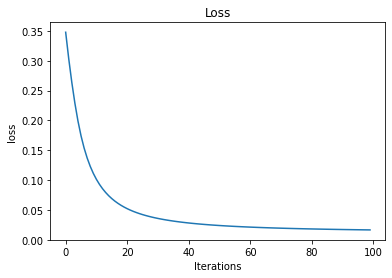

In [213]:
list_loss = descente_grad(loss, linear1, linear2, tanh, sig, datax, datay, iteration, gradient_step)
plot_loss(iteration, list_loss)

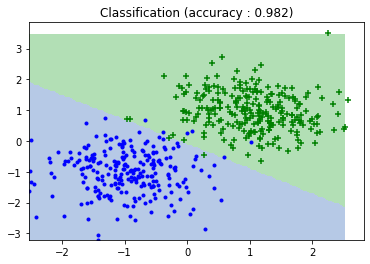

In [214]:
yhat = predict_non_lin(testx)
plot_front(testx, testy, yhat)

# CAS DATA 1

### neuron = 2 sans bruit

In [215]:
# Création données 
bruit = 0
datax, datay = gen_arti(centerx=1, centery=1, sigma=0.1, nbex=500, data_type=1, epsilon=bruit)
testx, testy = gen_arti(centerx=1, centery=1, sigma=0.1, nbex=500, data_type=1, epsilon=bruit)

datay = np.where(datay==-1,0,1).reshape((-1,1))
testy = np.where(testy==-1,0,1).reshape((-1,1))

In [216]:
# Paramètres
input = datax.shape[1]
neuron = 5
output = 1
iteration = 1000
gradient_step = 1e-2

In [217]:
# Création des classes Loss et Module
loss = MSELoss()
linear1 = Linear(input, neuron)
linear2= Linear(neuron, output)
tanh = TanH()
sig = Sigmoide()

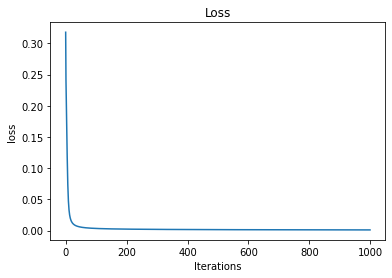

In [218]:
list_loss = descente_grad(loss, linear1, linear2, tanh, sig, datax, datay, iteration, gradient_step)
plot_loss(iteration, list_loss)

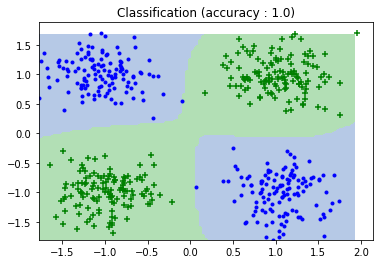

In [219]:
yhat = predict_non_lin(testx)
plot_front(testx, testy, yhat)

### neuron = 2 avec bruit

In [220]:
# Création données 
bruit = 0.5
datax, datay = gen_arti(centerx=1, centery=1, sigma=0.1, nbex=500, data_type=1, epsilon=bruit)
testx, testy = gen_arti(centerx=1, centery=1, sigma=0.1, nbex=500, data_type=1, epsilon=bruit)

datay = np.where(datay==-1,0,1).reshape((-1,1))
testy = np.where(testy==-1,0,1).reshape((-1,1))


In [221]:
# Paramètres
input = datax.shape[1]
neuron = 2
output = 1
iteration = 1000
gradient_step = 1e-2

In [222]:
# Création des classes Loss et Module
loss = MSELoss()
linear1 = Linear(input, neuron)
linear2= Linear(neuron, output)
tanh = TanH()
sig = Sigmoide()

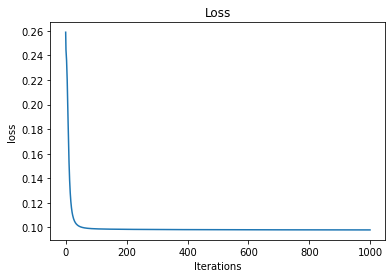

In [223]:
list_loss = descente_grad(loss, linear1, linear2, tanh, sig, datax, datay, iteration, gradient_step)
plot_loss(iteration, list_loss)

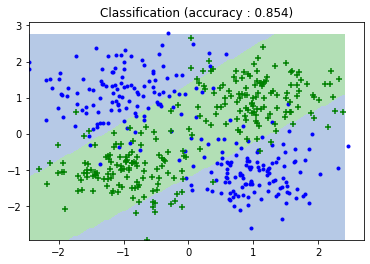

In [224]:
yhat = predict_non_lin(testx)
plot_front(testx, testy, yhat)

### neuron = 8 avec bruit

In [225]:
neuron = 8

loss = MSELoss()
linear1 = Linear(input, neuron)
linear2= Linear(neuron, output)
tanh = TanH()
sig = Sigmoide()

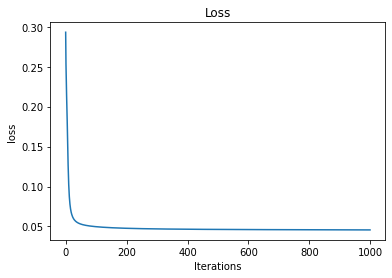

In [226]:
list_loss = descente_grad(loss, linear1, linear2, tanh, sig, datax, datay, iteration, gradient_step)
plot_loss(iteration, list_loss)

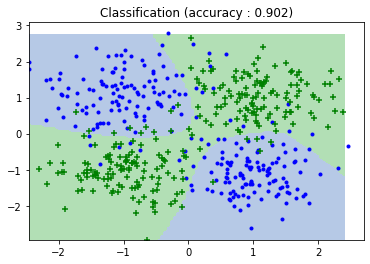

In [227]:
yhat = predict_non_lin(testx)
plot_front(testx, testy, yhat)

### neuron = 16 avec bruit

In [237]:
neuron = 64

loss = MSELoss()
linear1 = Linear(input, neuron)
linear2= Linear(neuron, output)
tanh = TanH()
sig = Sigmoide()

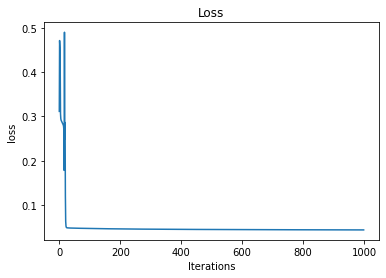

In [238]:
list_loss = descente_grad(loss, linear1, linear2, tanh, sig, datax, datay, iteration, gradient_step)
plot_loss(iteration, list_loss)

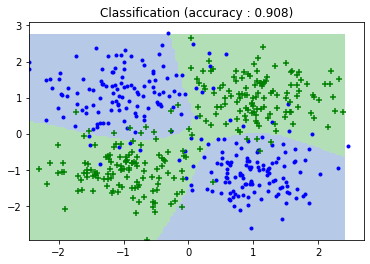

In [239]:
yhat = predict_non_lin(testx)
plot_front(testx, testy, yhat)